In [492]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

institutions = pd.read_csv('/Users/kaylibrownstein/general_assembly_dat/flatworld_sales/institutions.csv')

institutions.head()

# I've only included institutions from the IPEDS database that have FlatWorld student orders.

,name,COUNT(*),unitid,institution name,year,HD2017.FIPS state code,DRVADM2017.Percent admitted - total,DRVADM2017.Admissions yield - total,DRVADM2017.Admissions yield - women,DRVADM2017.Admissions yield - part time,...,"SFA1617.Average net price-students awarded grant or scholarship aid, 2016-17","SFA1617.Average net price-students awarded grant or scholarship aid, 2016-17_2",SFA1617.Number of students in full-year cohort,SFA1617.Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort,SFA1617.Number of full-time first-time undergraduates awarded any financial aid,SFA1617.Percent of full-time first-time undergraduates awarded any financial aid_2,"SFA1617.Average amount of federal, state, local or institutional grant aid awarded_2",SFA1617.Average amount of federal grant aid awarded to full-time first-time undergraduates,"DRVGR2017.Graduation rate, total cohort","DRVEF122017.12-month unduplicated headcount, undergraduate: 2016-17"
0,Abilene Christian University,162,222178,Abilene Christian University,2017,Texas,58.0,16.0,15.0,1.0,...,NaN,27175.0,NaN,993.0,967.0,97.0,18599.0,4506.0,61.0,3806.0
1,Abraham Baldwin Agricultural College,2,138558,Abraham Baldwin Agricultural College,2017,Georgia,70.0,65.0,64.0,12.0,...,8022.0,NaN,NaN,919.0,806.0,88.0,5432.0,4817.0,23.0,4012.0
2,Academy College,1,172866,Academy College,2017,Minnesota,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,63.0,149.0
3,Access Careers - Hempstead,1,483708,Access Careers,2017,New York,NaN,NaN,NaN,NaN,...,NaN,NaN,34.0,34.0,33.0,97.0,5091.0,5091.0,22.0,552.0
4,Ace Cosmetology and Barber Training Center,1,480736,Ace Cosmetology and Barber Training Center,2017,Connecticut,NaN,NaN,NaN,NaN,...,NaN,16475.0,11.0,11.0,9.0,82.0,5515.0,5515.0,100.0,37.0


In [493]:
print("There are {} rows and {} columns.".format(institutions.shape[0], institutions.shape[1]))

print("The column names are: {}".format(institutions.columns.tolist()))

institutions = institutions.rename(columns={'COUNT(*)': 'student orders'})

institutions.rename(columns=lambda x: x.split('.')[-1], inplace=True)

columns_to_drop = ['name', 'year', 'Average net price-students awarded grant or scholarship aid, 2016-17', 
                   'Average net price-students awarded grant or scholarship aid, 2016-17_2', 
                   'Admissions yield - women', 'Average amount of federal, state, local or institutional grant aid awarded_2', 
                   'Percent of full-time first-time undergraduates awarded any financial aid_2',
                   'Total price for in-district students living on campus  2017-18', 
                   'Total price for in-state students living on campus 2017-18'
                  ]

institutions = institutions.drop(columns_to_drop, axis=1, errors='ignore')
 
print(institutions.shape)

print(institutions.describe())

print(institutions.dtypes)

There are 1112 rows and 34 columns.
The column names are: ['name', 'COUNT(*)', 'unitid', 'institution name', 'year', 'HD2017.FIPS state code', 'DRVADM2017.Percent admitted - total', 'DRVADM2017.Admissions yield - total', 'DRVADM2017.Admissions yield - women', 'DRVADM2017.Admissions yield - part time', 'DRVIC2017.Tuition and fees, 2016-17', 'DRVIC2017.Total price for in-district students living on campus  2017-18', 'DRVIC2017.Total price for in-state students living on campus 2017-18', 'HD2017.Sector of institution', 'HD2017.Level of institution', 'DRVEF2017.Total  enrollment', 'DRVEF2017.Full-time enrollment', 'DRVEF2017.Part-time enrollment', 'SFA1617.Percent of full-time first-time undergraduates awarded any financial aid', 'SFA1617.Percent of full-time first-time undergraduates awarded federal, state, local or institutional grant aid', 'SFA1617.Average amount of federal, state, local or institutional grant aid awarded', 'SFA1617.Percent of full-time first-time undergraduates awarded

In [494]:
# I want to see null values in aggregate.

null_df = pd.DataFrame(institutions.isnull().sum(), columns=['Count of Nulls'])
null_df.index.name = 'Column'
print(null_df.sort_values(['Count of Nulls'], ascending=False).head(10))

# The "Number of students in full-year cohort" column is so rarely used, I'm going to remove it. 
# I don't think it is full enough to contribute much value.

if 'Number of students in full-year cohort' in institutions.columns:
    institutions.drop(columns=['Number of students in full-year cohort'], inplace=True)

institutions.isnull().sum()

                                                    Count of Nulls
Column                                                            
Number of students in full-year cohort                        1094
Admissions yield - total                                       451
Admissions yield - part time                                   451
Percent admitted - total                                       450
Average amount of other student loans awarded t...             289
Tuition and fees, 2016-17                                       73
Average amount of federal grant aid awarded to ...              66
Graduation rate, total cohort                                   65
Average amount of federal, state, local or inst...              65
Percent of full-time first-time undergraduates ...              59


Column
student orders                                                                                               0
unitid                                                                                                       0
institution name                                                                                             0
FIPS state code                                                                                              0
Percent admitted - total                                                                                   450
Admissions yield - total                                                                                   451
Admissions yield - part time                                                                               451
Tuition and fees, 2016-17                                                                                   73
Sector of institution                                                                                    

In [4]:
institutions.sort_values(by=['student orders'], ascending=False).head(3)

# The University of Texas at Austin has the most FlatWorld student orders, followed closely by University of North Carolina at Charlotte.

Column,student orders,unitid,institution name,FIPS state code,Percent admitted - total,Admissions yield - total,Admissions yield - part time,"Tuition and fees, 2016-17",Sector of institution,Level of institution,...,"Percent of full-time first-time undergraduates awarded federal, state, local or institutional grant aid","Average amount of federal, state, local or institutional grant aid awarded",Percent of full-time first-time undergraduates awarded federal grant aid,Percent of full-time first-time undergraduates awarded other student loans,Average amount of other student loans awarded to full-time first-time undergraduates,Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort,Number of full-time first-time undergraduates awarded any financial aid,Average amount of federal grant aid awarded to full-time first-time undergraduates,"Graduation rate, total cohort","12-month unduplicated headcount, undergraduate: 2016-17"
1002,1938,228778,The University of Texas at Austin,Texas,36.0,45.0,1.0,10092.0,"Public, 4-year or above",Four or more years,...,43.0,10644.0,23.0,2.0,13677.0,8570.0,5456.0,4583.0,83.0,42827.0
962,1905,199139,University of North Carolina at Charlotte,North Carolina,66.0,31.0,0.0,6763.0,"Public, 4-year or above",Four or more years,...,58.0,7385.0,32.0,7.0,12789.0,3439.0,2610.0,4450.0,54.0,26758.0
204,1807,434672,Community College of Baltimore County,Maryland,NaN,NaN,NaN,3868.0,"Public, 2-year",At least 2 but less than 4 years,...,65.0,4593.0,63.0,1.0,9134.0,1867.0,1387.0,4188.0,12.0,29115.0


In [268]:
institutions.sort_values(["FIPS state code"]).head(5)

institutions["FIPS state code"].value_counts()
# CA has the most student FW purchases, followed by NY. Wyoming has the least. Population may be one explanation for this.


California              130
New York                 66
Pennsylvania             64
Texas                    59
Massachusetts            51
Illinois                 41
Ohio                     41
Florida                  35
Washington               35
Georgia                  34
Virginia                 33
Missouri                 30
North Carolina           30
Kentucky                 27
Minnesota                23
Michigan                 22
Indiana                  22
Louisiana                21
Oregon                   20
Arizona                  20
Maryland                 19
Wisconsin                18
Connecticut              17
Colorado                 16
South Carolina           16
Tennessee                15
Oklahoma                 13
Kansas                   13
New Jersey               13
Maine                    12
West Virginia            12
New Mexico               12
Iowa                     12
Alabama                  10
Mississippi              10
Nebraska            

In [6]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(25, 25))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=8, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=8, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()
    fig.savefig('plot.png')

# The hypothesis is that financial aid, school size, graduation rate have a strong relatiionship with student orders.
# potential_feature_cols = ['Percent admitted - total', 'student orders', 'Admissions yield - total', 'Graduation rate, total cohort', 'Average amount of federal grant aid awarded to full-time first-time undergraduates', '12-month unduplicated headcount, undergraduate: 2016-17']
# correlation_heat_map(institutions[potential_feature_cols])

# It looks like the feature most strongly correlated with student orders is 12-month unduplicated headcount.
# This seems to suggest that as the school size increases, the number of student orders increases.

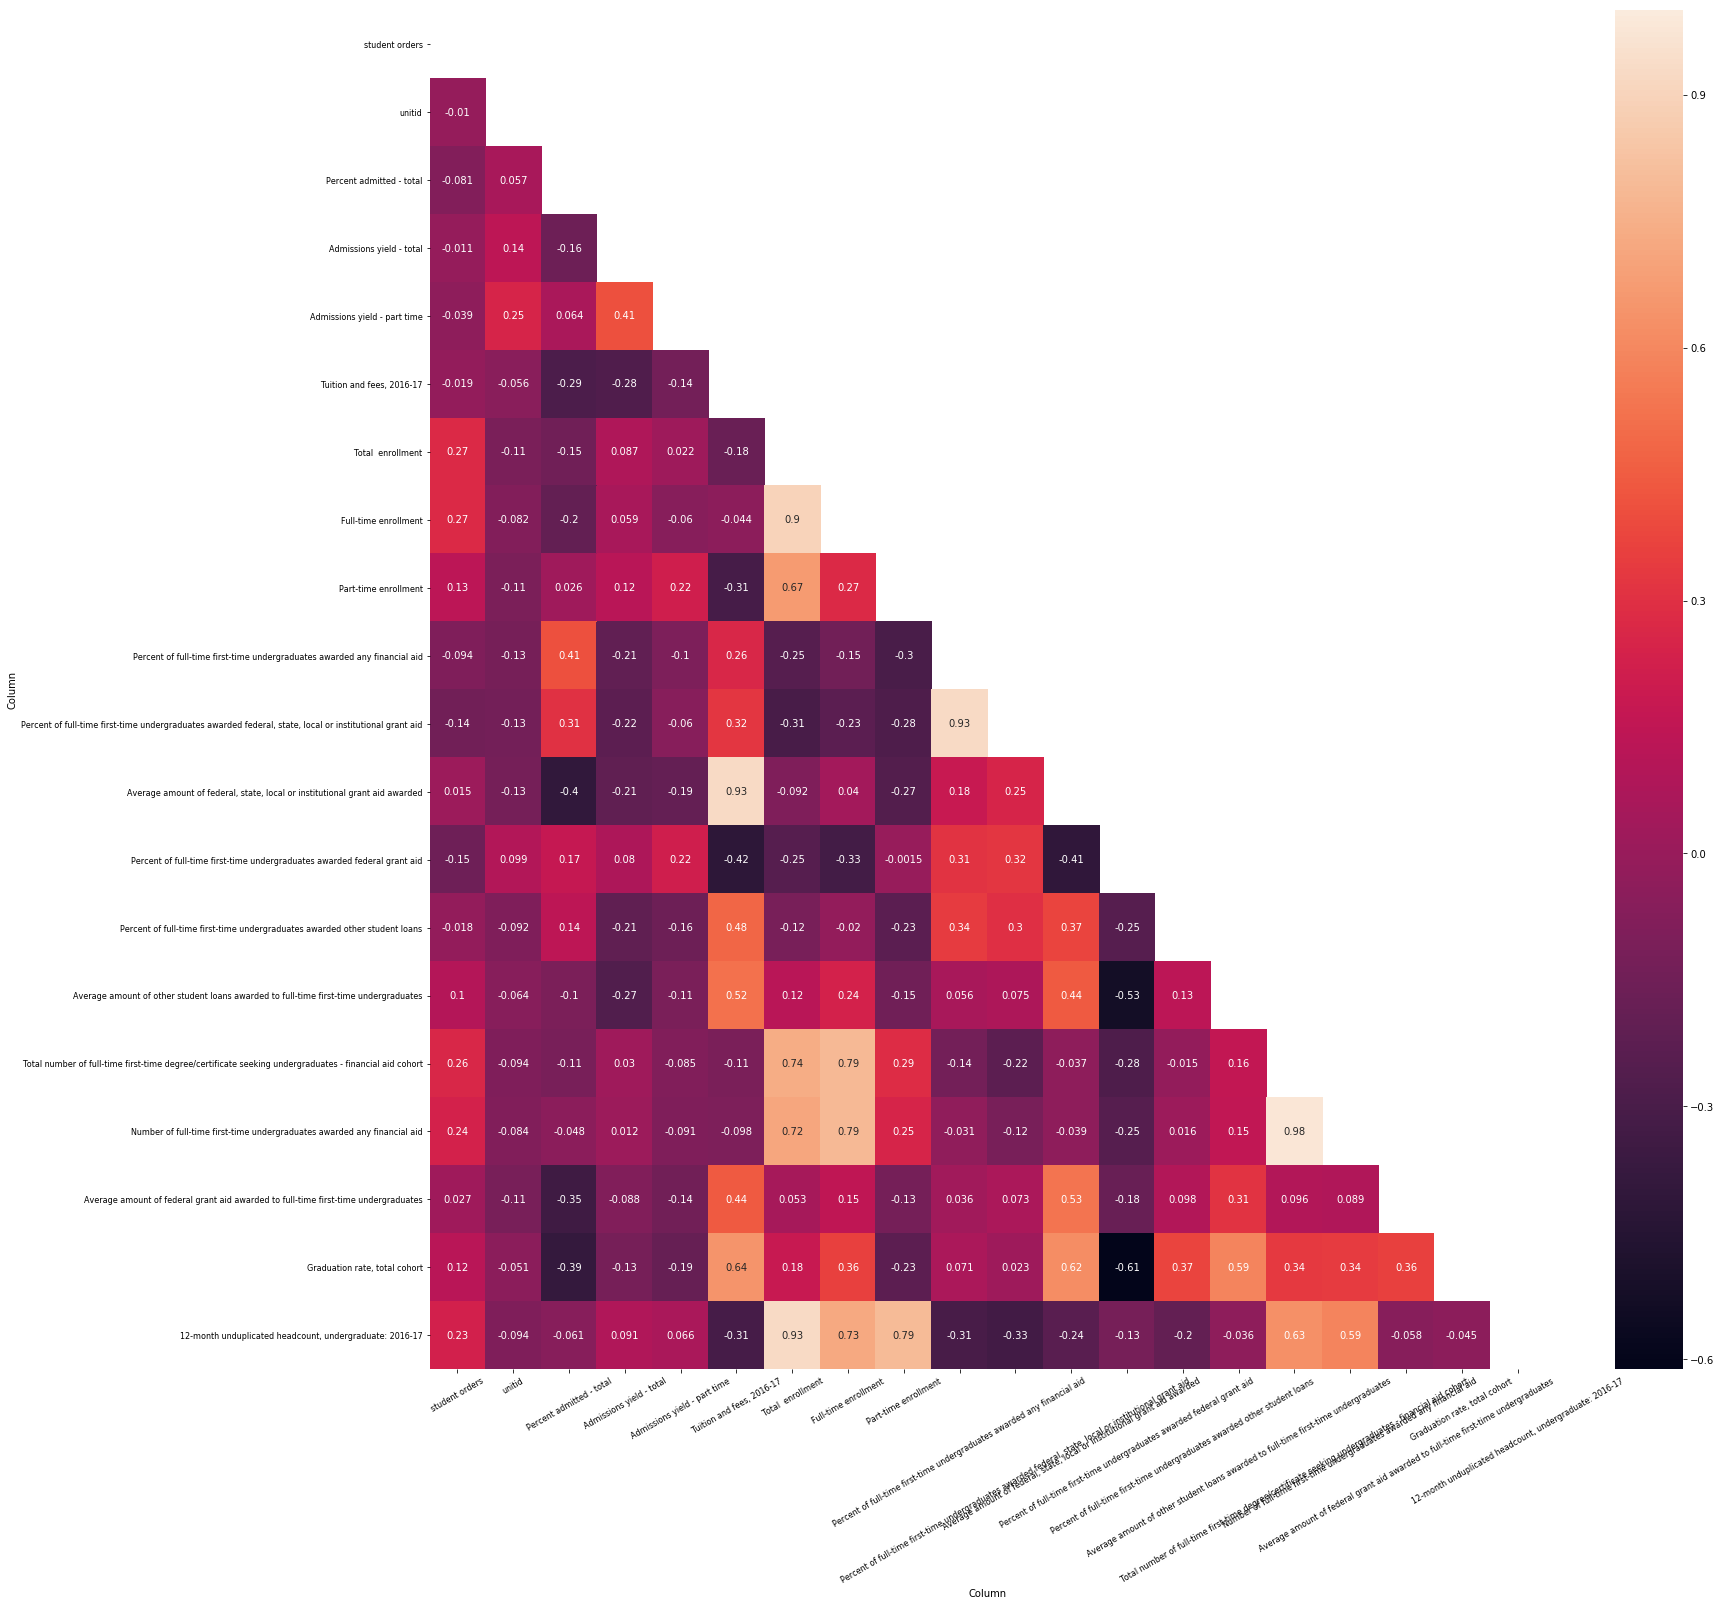

In [7]:
correlation_heat_map(institutions[institutions.columns.tolist()])

In [495]:
# Removing features that are strongly correlated to reduce multicollinearity.
    
# Number of full-time first-time undergraduates awarded any financial aid and 
# Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort are 0.98.
# The latter has less nulls, so I'll drop the former.

if 'Number of full-time first-time undergraduates awarded any financial aid' in institutions.columns:
    institutions.drop(columns=['Number of full-time first-time undergraduates awarded any financial aid'], inplace=True)


In [ ]:
# From the above heatmap, it looks like the variables that are most correlated with student orders are:
# 1. Total enrollment - 0.27
# 2. Full-time enrollment - 0.27
# 3. Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort - 0.26

# This seems to loosely suggest that the larger the school, the more student orders FlatWorld has.

In [9]:
institutions.sort_values(["Percent admitted - total"]).head(5)
# Looking at the selectivity of the school vs student orders. 
# Stanford is one of the most selective, but has a relatively large amount of orders.

Column,student orders,unitid,institution name,FIPS state code,Percent admitted - total,Admissions yield - total,Admissions yield - part time,"Tuition and fees, 2016-17",Sector of institution,Level of institution,...,Percent of full-time first-time undergraduates awarded any financial aid,"Percent of full-time first-time undergraduates awarded federal, state, local or institutional grant aid","Average amount of federal, state, local or institutional grant aid awarded",Percent of full-time first-time undergraduates awarded federal grant aid,Percent of full-time first-time undergraduates awarded other student loans,Average amount of other student loans awarded to full-time first-time undergraduates,Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort,Average amount of federal grant aid awarded to full-time first-time undergraduates,"Graduation rate, total cohort","12-month unduplicated headcount, undergraduate: 2016-17"
747,7,448309,Shorter University-College of Adult & Professi...,Georgia,0.0,NaN,NaN,9680.0,"Private not-for-profit, 4-year or above",Four or more years,...,100.0,100.0,5109.0,100.0,0.0,NaN,4.0,4546.0,61.0,307.0
348,1,166027,Harvard University,Massachusetts,5.0,83.0,0.0,47074.0,"Private not-for-profit, 4-year or above",Four or more years,...,72.0,56.0,49870.0,15.0,8.0,6764.0,1665.0,7389.0,96.0,13844.0
794,207,243744,Stanford University,California,5.0,82.0,0.0,47940.0,"Private not-for-profit, 4-year or above",Four or more years,...,67.0,50.0,50134.0,14.0,1.0,23157.0,1738.0,5645.0,94.0,8402.0
201,3,190150,Columbia University in the City of New York,New York,7.0,61.0,0.0,55056.0,"Private not-for-profit, 4-year or above",Four or more years,...,59.0,52.0,49185.0,17.0,3.0,26052.0,1447.0,6968.0,95.0,8523.0
469,57,166683,Massachusetts Institute of Technology,Massachusetts,7.0,76.0,0.0,48452.0,"Private not-for-profit, 4-year or above",Four or more years,...,84.0,58.0,43248.0,17.0,4.0,11307.0,1115.0,7908.0,94.0,4680.0


In [270]:
# These are the columns I'll be using.
institutions.columns.tolist()

['student orders',
 'unitid',
 'institution name',
 'FIPS state code',
 'Percent admitted - total',
 'Admissions yield - total',
 'Admissions yield - part time',
 'Tuition and fees, 2016-17',
 'Sector of institution',
 'Level of institution',
 'Total  enrollment',
 'Full-time enrollment',
 'Part-time enrollment',
 'Percent of full-time first-time undergraduates awarded any financial aid',
 'Percent of full-time first-time undergraduates awarded federal, state, local or institutional grant aid',
 'Average amount of federal, state, local or institutional grant aid awarded',
 'Percent of full-time first-time undergraduates awarded federal grant aid',
 'Percent of full-time first-time undergraduates awarded other student loans',
 'Average amount of other student loans awarded to full-time first-time undergraduates',
 'Number of students in full-year cohort',
 'Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort',
 'Average amount of federal

In [11]:
institutions.dtypes

Column
student orders                                                                                               int64
unitid                                                                                                       int64
institution name                                                                                            object
FIPS state code                                                                                             object
Percent admitted - total                                                                                   float64
Admissions yield - total                                                                                   float64
Admissions yield - part time                                                                               float64
Tuition and fees, 2016-17                                                                                  float64
Sector of institution                                                    

In [12]:
# Looking at existing categorical variables:
print("There are {} unique Level of institution values.".format(institutions['Level of institution'].nunique()))
print("There are {} unique Sector of institution values.".format(institutions['Sector of institution'].nunique()))

There are 3 unique Level of institution values.
There are 9 unique Sector of institution values.


In [496]:
# 'Sector of institution' and 'Level of institution' are categorical values, so I'm making dummy vars.
institutions['Sector of institution'].unique()

sectors_dummies = pd.get_dummies(institutions['Sector of institution'], prefix='sector')

sectors_dummies.sample(n=5, random_state=1)
sectors_dummies.drop(sectors_dummies.columns[0], axis=1, inplace=True)
sectors_dummies.sample(n=5, random_state=1)

institutions = pd.concat([institutions, sectors_dummies], axis=1)
institutions.sample(n=5, random_state=1)


,student orders,unitid,institution name,FIPS state code,Percent admitted - total,Admissions yield - total,Admissions yield - part time,"Tuition and fees, 2016-17",Sector of institution,Level of institution,...,"Graduation rate, total cohort","12-month unduplicated headcount, undergraduate: 2016-17","sector_Private for-profit, 2-year","sector_Private for-profit, 4-year or above","sector_Private for-profit, less-than 2-year","sector_Private not-for-profit, 2-year","sector_Private not-for-profit, 4-year or above","sector_Public, 2-year","sector_Public, 4-year or above","sector_Public, less-than 2-year"
306,212,131469,George Washington University,District of Columbia,41.0,24.0,0.0,51950.0,"Private not-for-profit, 4-year or above",Four or more years,...,81.0,12358.0,0,0,0,0,1,0,0,0
707,16,152363,Saint Josephs College,Indiana,NaN,NaN,NaN,NaN,"Private not-for-profit, 4-year or above",Four or more years,...,NaN,NaN,0,0,0,0,1,0,0,0
126,1,129367,Capital Community College,Connecticut,NaN,NaN,NaN,4236.0,"Public, 2-year",At least 2 but less than 4 years,...,6.0,4950.0,0,0,0,0,0,1,0,0
691,1,207670,Rose State College,Oklahoma,NaN,NaN,NaN,3808.0,"Public, 2-year",At least 2 but less than 4 years,...,19.0,9667.0,0,0,0,0,0,1,0,0
874,1,103529,University of Alaska System of Higher Education,Alaska,NaN,NaN,NaN,NaN,Administrative Unit,Four or more years,...,NaN,NaN,0,0,0,0,0,0,0,0


In [497]:
institutions['Level of institution'].unique()

levels_dummies = pd.get_dummies(institutions['Level of institution'], prefix='level')

levels_dummies.sample(n=5, random_state=1)
levels_dummies.drop(levels_dummies.columns[0], axis=1, inplace=True)
levels_dummies.sample(n=5, random_state=1)

institutions = pd.concat([institutions, levels_dummies], axis=1)
institutions.sample(n=10, random_state=1)


,student orders,unitid,institution name,FIPS state code,Percent admitted - total,Admissions yield - total,Admissions yield - part time,"Tuition and fees, 2016-17",Sector of institution,Level of institution,...,"sector_Private for-profit, 2-year","sector_Private for-profit, 4-year or above","sector_Private for-profit, less-than 2-year","sector_Private not-for-profit, 2-year","sector_Private not-for-profit, 4-year or above","sector_Public, 2-year","sector_Public, 4-year or above","sector_Public, less-than 2-year",level_Four or more years,level_Less than 2 years (below associate)
306,212,131469,George Washington University,District of Columbia,41.0,24.0,0.0,51950.0,"Private not-for-profit, 4-year or above",Four or more years,...,0,0,0,0,1,0,0,0,1,0
707,16,152363,Saint Josephs College,Indiana,NaN,NaN,NaN,NaN,"Private not-for-profit, 4-year or above",Four or more years,...,0,0,0,0,1,0,0,0,1,0
126,1,129367,Capital Community College,Connecticut,NaN,NaN,NaN,4236.0,"Public, 2-year",At least 2 but less than 4 years,...,0,0,0,0,0,1,0,0,0,0
691,1,207670,Rose State College,Oklahoma,NaN,NaN,NaN,3808.0,"Public, 2-year",At least 2 but less than 4 years,...,0,0,0,0,0,1,0,0,0,0
874,1,103529,University of Alaska System of Higher Education,Alaska,NaN,NaN,NaN,NaN,Administrative Unit,Four or more years,...,0,0,0,0,0,0,0,0,1,0
226,40,190664,CUNY Queens College,New York,43.0,22.0,0.0,6938.0,"Public, 4-year or above",Four or more years,...,0,0,0,0,0,0,1,0,1,0
741,8,199643,Shaw University,North Carolina,53.0,8.0,0.0,16580.0,"Private not-for-profit, 4-year or above",Four or more years,...,0,0,0,0,1,0,0,0,1,0
868,41,196088,University at Buffalo,New York,57.0,26.0,0.0,9574.0,"Public, 4-year or above",Four or more years,...,0,0,0,0,0,0,1,0,1,0
200,1,420556,Columbia Gorge Community College,Oregon,NaN,NaN,NaN,4068.0,"Public, 2-year",At least 2 but less than 4 years,...,0,0,0,0,0,1,0,0,0,0
133,129,183974,Centenary University,New Jersey,87.0,22.0,0.0,32098.0,"Private not-for-profit, 4-year or above",Four or more years,...,0,0,0,0,1,0,0,0,1,0


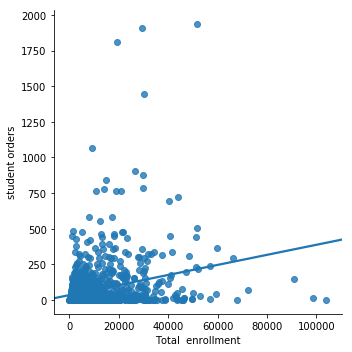

In [15]:
sns.lmplot(x='Total  enrollment', y='student orders', data=institutions, ci=None);


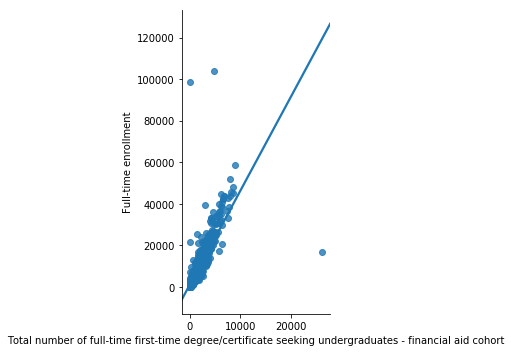

In [16]:
sns.lmplot(x='Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort', y='Full-time enrollment', data=institutions, ci=None);


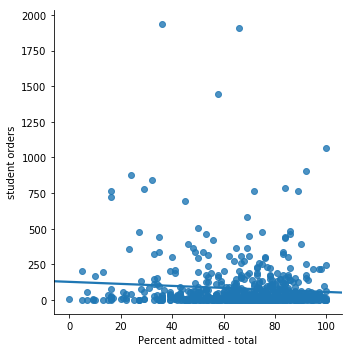

In [17]:
sns.lmplot(x='Percent admitted - total', y='student orders', data=institutions, ci=None);


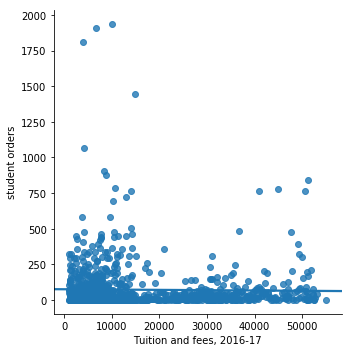

In [18]:
sns.lmplot(x='Tuition and fees, 2016-17', y='student orders', data=institutions, ci=None);


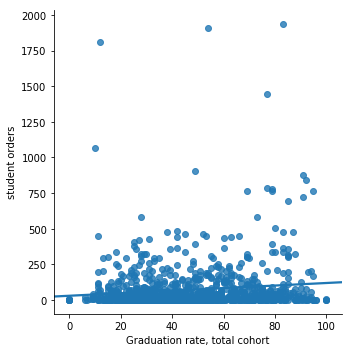

In [20]:
sns.lmplot(x='Graduation rate, total cohort', y='student orders', data=institutions, ci=None);


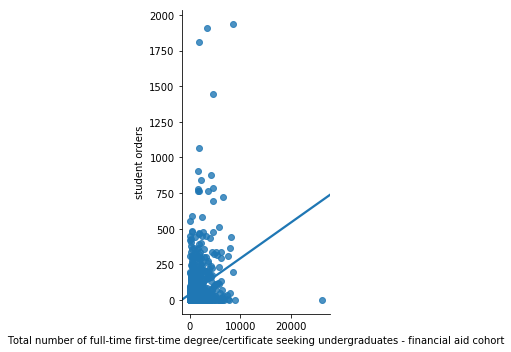

In [21]:
sns.lmplot(x='Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort', y='student orders', data=institutions, ci=None);


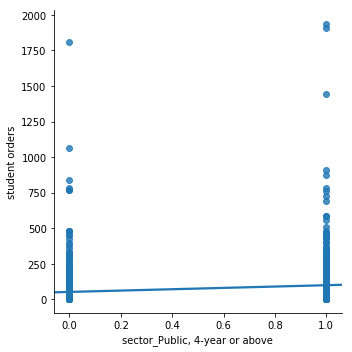

In [22]:
sns.lmplot(x='sector_Public, 4-year or above', y='student orders', data=institutions, ci=None);


In [297]:
institutions.isnull().sum()

student orders                                                                                               0
unitid                                                                                                       0
institution name                                                                                             0
FIPS state code                                                                                              0
Percent admitted - total                                                                                   450
Admissions yield - total                                                                                   451
Admissions yield - part time                                                                               451
Tuition and fees, 2016-17                                                                                   73
Sector of institution                                                                                        0
L

In [498]:
institutions_with_mean_for_na_values = institutions.copy()

In [499]:
# fill na's with mean of groupby Level of Institution
inst_name_col = institutions['institution name']
state_name_col = institutions['FIPS state code']
level_col = institutions['Level of institution']
sector_col = institutions['Sector of institution']

grouped = institutions.groupby(['Level of institution'])
transformed_group = grouped.transform(lambda x: x.fillna((x.mean())))
institutions = transformed_group
institutions['Level of institution'] = level_col
institutions['Sector of institution'] = sector_col
institutions['institution name'] = inst_name_col
institutions['FIPS state code'] = state_name_col


In [500]:
institutions.isnull().sum()
# Now we only have 11 null values for "Tuition and fees, 2016-17"

student orders                                                                                              0
unitid                                                                                                      0
Percent admitted - total                                                                                    0
Admissions yield - total                                                                                    0
Admissions yield - part time                                                                                0
Tuition and fees, 2016-17                                                                                  11
Total  enrollment                                                                                           0
Full-time enrollment                                                                                        0
Part-time enrollment                                                                                        0
Percent of

In [301]:
institutions.shape


(1112, 33)

In [501]:
# Just drop the 11 rows with null values for "Tuition and fees, 2016-17"
institutions.dropna(inplace=True)

In [448]:
institutions.shape


(1101, 33)

In [502]:
# Linear regression using dummy vars sector and level

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

feature_cols = [
                'sector_Private for-profit, 2-year',
                'sector_Private for-profit, 4-year or above',
                'sector_Private for-profit, less-than 2-year',
                'sector_Private not-for-profit, 2-year',
                'sector_Private not-for-profit, 4-year or above',
                'sector_Public, 2-year',
                'sector_Public, 4-year or above',
                'sector_Public, less-than 2-year',
                'level_Four or more years',
                'level_Less than 2 years (below associate)',
                'level_Four or more years',
                'level_Less than 2 years (below associate)']
X = institutions[feature_cols]
y = institutions['student orders']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7, test_size=0.1)


# instantiate regressor
lr = LinearRegression()
# fit regression
lr.fit(X_train,y_train)
# predict student orders from sector and level dummy vars
y_preds = lr.predict(X_test)
y_preds[:5]

array([ 69.51785714,  17.09375   ,  69.51785714, 101.90185676,
        52.83024691])

In [503]:
from sklearn.metrics import mean_squared_error

print('null model RMSE: '+str(np.sqrt(mean_squared_error(y.map(lambda x: y.mean()),y))))
print('simple model RMSE: '+str(np.sqrt(mean_squared_error(y_test,y_preds))))

null model RMSE: 158.47352271447917
simple model RMSE: 75.37336877545823


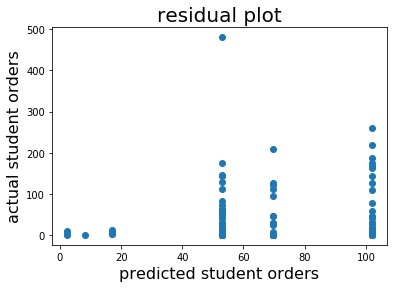

In [48]:
plt.title('residual plot', fontsize=20)
plt.xlabel('predicted student orders', fontsize=16)
plt.ylabel('actual student orders', fontsize=16)
plt.scatter(y_preds,y_test);

In [506]:
institutions_with_mean_for_na_values.fillna(institutions_with_mean_for_na_values.mean(), inplace=True)

# Remaining missing values when using mean? No.
print(institutions_with_mean_for_na_values.isnull().sum())
institutions_with_mean_for_na_values.columns[institutions_with_mean_for_na_values.isna().any()].tolist()

# The missingness of "Percent admitted - total", "Admissions yield - total", "Admissions yield - part time"
# are strongly related. It looks like when one is missing, all three are missing for the institution.

student orders                                                                                             0
unitid                                                                                                     0
institution name                                                                                           0
FIPS state code                                                                                            0
Percent admitted - total                                                                                   0
Admissions yield - total                                                                                   0
Admissions yield - part time                                                                               0
Tuition and fees, 2016-17                                                                                  0
Sector of institution                                                                                      0
Level of institutio

[]

In [507]:
# Linear regression using mean for null values

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

feature_cols = [
                'Tuition and fees, 2016-17', 
                'Total  enrollment', 
                'Graduation rate, total cohort', 
                'Average amount of federal, state, local or institutional grant aid awarded',
                'sector_Private for-profit, 2-year',
                'sector_Private for-profit, 4-year or above',
                'sector_Private for-profit, less-than 2-year',
                'sector_Private not-for-profit, 2-year',
                'sector_Private not-for-profit, 4-year or above',
                'sector_Public, 2-year',
                'sector_Public, 4-year or above',
                'sector_Public, less-than 2-year',
                'level_Four or more years',
                'level_Less than 2 years (below associate)',
                'level_Four or more years',
                'level_Less than 2 years (below associate)']

X = institutions_with_mean_for_na_values[feature_cols]
y = institutions_with_mean_for_na_values['student orders']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 7, test_size=0.1)

# instantiate regressor
lr = LinearRegression()
# fit regression
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

# Null RMSE is the RMSE that could be achieved by always predicting the mean response value. 
# It is a benchmark against which you may want to measure your regression model.

print('null model RMSE: '+str(np.sqrt(mean_squared_error(y.map(lambda x: y.mean()),y))))
print('simple model RMSE: '+str(np.sqrt(mean_squared_error(y_test,y_preds))))

null model RMSE: 157.82779920329227
simple model RMSE: 84.7730945188945


In [513]:
feature_cols = [
 'Percent admitted - total',
 'Admissions yield - total',
 'Admissions yield - part time',
 'Tuition and fees, 2016-17',
 'Total  enrollment',
 'Full-time enrollment',
 'Part-time enrollment',
 'Percent of full-time first-time undergraduates awarded any financial aid',
 'Percent of full-time first-time undergraduates awarded federal, state, local or institutional grant aid',
 'Average amount of federal, state, local or institutional grant aid awarded',
 'Percent of full-time first-time undergraduates awarded federal grant aid',
 'Percent of full-time first-time undergraduates awarded other student loans',
 'Average amount of other student loans awarded to full-time first-time undergraduates',
 'Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort',
 'Average amount of federal grant aid awarded to full-time first-time undergraduates',
 'Graduation rate, total cohort',
 '12-month unduplicated headcount, undergraduate: 2016-17',
 'sector_Private for-profit, 2-year',
 'sector_Private for-profit, 4-year or above',
 'sector_Private for-profit, less-than 2-year',
 'sector_Private not-for-profit, 2-year',
 'sector_Private not-for-profit, 4-year or above',
 'sector_Public, 2-year',
 'sector_Public, 4-year or above',
 'sector_Public, less-than 2-year',
 'level_Four or more years',
 'level_Less than 2 years (below associate)']

# Linear regression using complete dataset, nulls filled, with ALL integer features

X = institutions[feature_cols]
y = institutions['student orders']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 7, test_size=0.1)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

print('null model RMSE: '+str(np.sqrt(mean_squared_error(y.map(lambda x: y.mean()),y))))
print('simple model RMSE: '+str(np.sqrt(mean_squared_error(y_preds,y_test))))

# This simple model has a lower simple model RMSE than the one using the mean values.

null model RMSE: 158.47352271447917
simple model RMSE: 76.89288796758807


In [514]:
# Linear regression using complete dataset, nulls filled

# Best results using 'Total  enrollment' and 'Average amount of federal, state, local or institutional grant aid awarded'

feature_cols = [
                'Tuition and fees, 2016-17', 
                'Total  enrollment', 
                'Graduation rate, total cohort', 
                'Average amount of federal, state, local or institutional grant aid awarded',
                'Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort',
                'Percent admitted - total'
            ]

X = institutions[feature_cols]
y = institutions['student orders']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 7, test_size=0.1)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

print('null model RMSE: '+str(np.sqrt(mean_squared_error(y.map(lambda x: y.mean()),y))))
print('simple model RMSE: '+str(np.sqrt(mean_squared_error(y_preds,y_test))))

# This simple model has a lower simple model RMSE than the one using the mean values and the one using all features.

null model RMSE: 158.47352271447917
simple model RMSE: 73.67495927900984


In [515]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# Note the results will vary each run since we take a different
#   subset of the data each time (since shuffle=True)
kf = model_selection.KFold(n_splits=5, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

23630.264079058707
0.05291090538339642


In [516]:
institutions['sales_prediction'] = institutions['student orders'].mean()
institutions

,student orders,unitid,Percent admitted - total,Admissions yield - total,Admissions yield - part time,"Tuition and fees, 2016-17",Total enrollment,Full-time enrollment,Part-time enrollment,Percent of full-time first-time undergraduates awarded any financial aid,...,"sector_Public, 2-year","sector_Public, 4-year or above","sector_Public, less-than 2-year",level_Four or more years,level_Less than 2 years (below associate),Level of institution,Sector of institution,institution name,FIPS state code,sales_prediction
0,162,222178,58.000000,16.000000,1.000000,32070.000000,5145.0,3846.0,1299.0,97.000000,...,0,0,0,1,0,Four or more years,"Private not-for-profit, 4-year or above",Abilene Christian University,Texas,69.665758
1,2,138558,70.000000,65.000000,12.000000,3453.000000,3394.0,2470.0,924.0,88.000000,...,0,1,0,1,0,Four or more years,"Public, 4-year or above",Abraham Baldwin Agricultural College,Georgia,69.665758
2,1,172866,66.561832,30.652905,1.188073,17409.000000,65.0,45.0,20.0,0.000000,...,0,0,0,1,0,Four or more years,"Private for-profit, 4-year or above",Academy College,Minnesota,69.665758
5,4,126182,99.000000,22.000000,1.000000,9153.000000,3314.0,1864.0,1450.0,98.000000,...,0,1,0,1,0,Four or more years,"Public, 4-year or above",Adams State University,Colorado,69.665758
6,20,188429,73.000000,13.000000,0.000000,35740.000000,7978.0,6329.0,1649.0,94.000000,...,0,0,0,1,0,Four or more years,"Private not-for-profit, 4-year or above",Adelphi University,New York,69.665758
7,1,188438,76.000000,55.333333,18.166667,4693.000000,3892.0,2189.0,1703.0,75.000000,...,1,0,0,0,0,At least 2 but less than 4 years,"Public, 2-year",Adirondack Community College,New York,69.665758
8,105,138716,66.561832,30.652905,1.188073,5490.000000,6615.0,4093.0,2522.0,92.000000,...,0,1,0,1,0,Four or more years,"Public, 4-year or above",Albany State University,Georgia,69.665758
9,1,138682,76.000000,55.333333,18.166667,2654.000000,3167.0,1232.0,1935.0,95.000000,...,1,0,0,0,0,At least 2 but less than 4 years,"Public, 2-year",Albany Technical College,Georgia,69.665758
10,1,128498,64.000000,19.000000,0.000000,30526.000000,1464.0,1276.0,188.0,96.000000,...,0,0,0,1,0,Four or more years,"Private not-for-profit, 4-year or above",Albertus Magnus College,Connecticut,69.665758
11,28,210571,50.000000,11.000000,0.000000,41544.000000,2036.0,1993.0,43.0,100.000000,...,0,0,0,1,0,Four or more years,"Private not-for-profit, 4-year or above",Albright College,Pennsylvania,69.665758


In [517]:
from sklearn import metrics
import numpy as np

np.sqrt(metrics.mean_squared_error(institutions['student orders'], institutions['sales_prediction']))
# same as null model RMSE

158.47352271447917

In [520]:
institutions.drop(['sales_prediction'], axis=1, inplace=True)

In [522]:
from sklearn.ensemble import RandomForestRegressor

# max_features=5 is best and n_estimators=150 is sufficiently large.
rfreg = RandomForestRegressor(n_estimators=150, oob_score=True, random_state=1)
rfreg.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
           oob_score=True, random_state=1, verbose=0, warm_start=False)

In [524]:
# Compute feature importances.
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance')

,feature,importance
5,Percent admitted - total,0.098943
3,"Average amount of federal, state, local or ins...",0.133981
0,"Tuition and fees, 2016-17",0.150805
2,"Graduation rate, total cohort",0.158065
1,Total enrollment,0.173264
4,Total number of full-time first-time degree/ce...,0.284941


In [526]:
# Compute the out-of-bag R-squared score.
print((rfreg.oob_score_))

# Find the average RMSE.
scores = cross_val_score(rfreg, X, y, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

-0.14182443809762724


/Users/kaylibrownstein/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


162.31419648741613

In [118]:
X.shape

(1101, 16)

In [527]:
# Fit the model on only the train data
rfreg = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=None, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [528]:

# Set a threshold for which features to include.
from sklearn.feature_selection import SelectFromModel

print(SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_train).shape)
print(SelectFromModel(rfreg, threshold='median', prefit=True).transform(X_train).shape)

(990, 2)
(990, 3)


In [529]:
# Create a new feature matrix that only includes important features.

X_important =  SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_test)

In [530]:
rfreg = RandomForestRegressor(n_estimators=110, random_state=1)

scores = cross_val_score(rfreg, X_important, y_test, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))


72.16106376641808

In [531]:
# Tuning params
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()
rfreg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [532]:
# List of values to try for n_estimators:
estimator_range = list(range(10, 310, 10))

# List to store the average RMSE for each value of n_estimators:
RMSE_scores = []

# Use five-fold cross-validation with each value of n_estimators (Warning: Slow!).
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

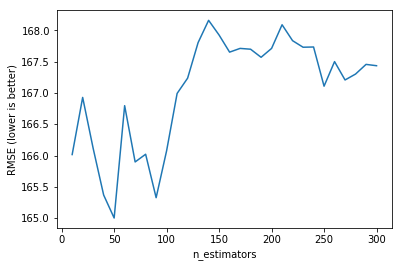

In [533]:
# Plot RMSE (y-axis) versus n_estimators (x-axis).

plt.plot(estimator_range, RMSE_scores);

plt.xlabel('n_estimators');
plt.ylabel('RMSE (lower is better)');

In [548]:
# List of values to try for max_features:
feature_range = list(range(1, len(feature_cols)+1))

# List to store the average RMSE for each value of max_features:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_features (Warning: Super slow!).
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=50, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

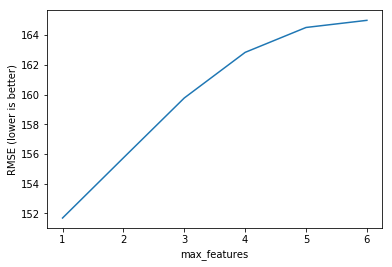

In [554]:
# Plot max_features (x-axis) versus RMSE (y-axis).

plt.plot(feature_range, RMSE_scores);

plt.xlabel('max_features');
plt.ylabel('RMSE (lower is better)');

In [550]:
sorted(zip(RMSE_scores, feature_range))[0]


(151.6825249586372, 1)

In [556]:
# Fit the model on only the train data
rfreg = RandomForestRegressor(n_estimators=50, random_state=1)
rfreg.fit(X_train, y_train)

scores = cross_val_score(rfreg, X_important, y_test, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))


70.75690179032213

In [557]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [209]:
# This will be the custom, basic version of a Random Forest in the style of
# sklearn's models
class RandomForest(object):
    
    # The __init__ function takes 3 keyword arguments:
    # n_estimators: how many decision tree classifiers are we going to 
    # fit?
    # max_depth: what is the max depth of the internal "base estimator"
    # decision trees?
    # max_features: also a parameter passed to the decision tree classifier
    def __init__(self, n_estimators=3, max_depth=None, max_features=None):
        
        # Set up the 3 keyword arguments as class attributes:
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        
        # create a dictionary that will hold our base estimators
        self.base_estimators = {}
        
        
    # The makes the internal decision tree classifiers
    # Takes data X, y and also an estimator number for
    # assignment to the self.base_estimators dictionary
    def _make_base_estimator(self, X, y, estimator_number):
        
        # make random sample of X, y
        row_indices = list(range(X.shape[0]))
        
        # np.random.choice gives us a random sample of the row
        # indice with replacement
        random_indices = np.random.choice(row_indices, size=len(row_indices),
                                          replace=True)
        
        
        # make "bootstrapped" X, y
        # versions of the data indexed by the randomly sampled row indices
        Xr = X.iloc[random_indices, :]
        yr = y[random_indices]
        
        # Initialize a decision tree classifier with the max_depth
        # and max_features attributes
        dtc = DecisionTreeClassifier(max_depth=self.max_depth,
                                     max_features=self.max_features)
        
        # fit the dtc:
        dtc.fit(Xr, yr)
        
        # put the dtc into our base_estimator dictionary
        self.base_estimators[estimator_number] = dtc
                
    
    # Fitting is actually delegated to the _make_base_estimator function.
    # You specify a number of estimators that you want to fit, and so
    # it iterates through that range, fitting that number of trees
    def fit(self, X, y):
        
        for i in range(self.n_estimators):
            self._make_base_estimator(X, y, i)
            
    
    # Predict calls back into the stored base estimators to get
    # predictions for each. 
    # NOTE: THIS FUNCTION ONLY WORKS FOR THE BINARY 1/0 CLASS
    # PROBLEM!
    def predict(self, X):
        
        # set up votes array with just zeros in it, 
        # the length of rows in X:
        votes = np.zeros(X.shape[0])
        
        # iterate through all the base estimators
        for i in range(self.n_estimators):
            # get out the current one from the dictionary
            base_model = self.base_estimators[i]
            
            # predict with the base estimator on the X matrix
            current_pred = base_model.predict(X)
            
            # add whatever the predictions are to the votes array
            votes = votes + current_pred
            
        # The final output predictions will be 1 any time the vote 
        # count for class 1 was greater than half the number of 
        # base estimators. 
        yhat = (votes >= self.n_estimators/2.).astype(np.int)
        
        return yhat
        
    
    def score(self, X, y):
        
        y = np.array(y)
        
        yhat = self.predict(X)
        
        return ()

In [564]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33)

dtc = DecisionTreeClassifier(max_depth=None, max_features='auto')
dtc.fit(X_train, y_train)
print('dtc acc:', dtc.score(X_test, y_test))

# rf = RandomForest(n_estimators=1000, max_depth=None, max_features='auto')
# rf.fit(Xtrain, ytrain)
# yhat = rf.predict(Xtest)
# print('rf acc:', accuracy_score(ytest, yhat))

# # rfreg = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True, random_state=1)
# # rfreg.fit(X_train, y_train)
# # yhat = rfreg.predict(X_test)
# # print('rf acc:', accuracy_score(y_test, yhat))

dtc acc: 0.0990990990990991


In [580]:
# Instantiate a DecisionTreeRegressor (with random_state=1).
from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [581]:
# Use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

213.9753441381261

In [582]:
# List of values to try:
max_depth_range = list(range(1, 8))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use LOOCV with each value of max_depth.
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

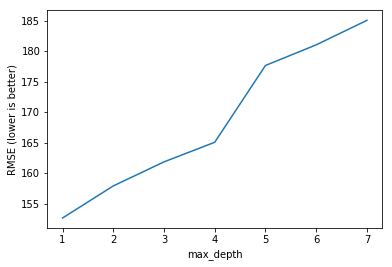

In [583]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [584]:
# max_depth=1 was best, so fit a tree using that parameter.
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [585]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature.
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,"Tuition and fees, 2016-17",0.0
1,Total enrollment,0.0
2,"Graduation rate, total cohort",0.0
3,"Average amount of federal, state, local or ins...",0.0
4,Total number of full-time first-time degree/ce...,1.0
5,Percent admitted - total,0.0


In [586]:
y_pred = treereg.predict(X_test)

y_pred

array([41.56391876, 41.56391876, 41.56391876, 41.56391876, 41.56391876,
       41.56391876, 41.56391876, 41.56391876, 41.56391876, 41.56391876,
       41.56391876, 41.56391876, 41.56391876, 41.56391876, 41.56391876,
       41.56391876, 41.56391876, 41.56391876, 41.56391876, 41.56391876,
       41.56391876, 41.56391876, 41.56391876, 41.56391876, 41.56391876,
       41.56391876, 41.56391876, 41.56391876, 41.56391876, 41.56391876,
       41.56391876, 41.56391876, 41.56391876, 41.56391876, 41.56391876,
       41.56391876, 41.56391876, 41.56391876, 41.56391876, 41.56391876,
       41.56391876, 41.56391876, 41.56391876, 41.56391876, 41.56391876,
       41.56391876, 41.56391876, 41.56391876, 41.56391876, 41.56391876,
       41.56391876, 41.56391876, 41.56391876, 41.56391876, 41.56391876,
       41.56391876, 41.56391876, 41.56391876, 41.56391876, 41.56391876,
       41.56391876, 41.56391876, 41.56391876, 41.56391876, 41.56391876,
       41.56391876, 41.56391876, 41.56391876, 41.56391876, 41.56

In [592]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))


71.24448653103755

In [577]:
institutions['student orders'].describe()

count    1101.000000
mean       69.665758
std       158.545540
min         1.000000
25%         3.000000
50%        17.000000
75%        63.000000
max      1938.000000
Name: student orders, dtype: float64

In [558]:
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=2, random_state=0,
                              n_estimators=100)
regr.fit(X_train, y_train)

print(regr.feature_importances_)
ypreds = regr.predict(X_test)
print(regr.score(X_test, y_test))


[0.02349244 0.08019708 0.17921272 0.00654506 0.66247556 0.04807714]
-0.04890122616326198


In [559]:
from sklearn.preprocessing import StandardScaler

# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [560]:
model = RandomForestRegressor(n_jobs=-1)


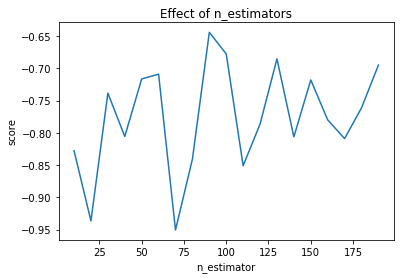

In [561]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [562]:
scores

[-0.8277230983290267,
 -0.936417103635232,
 -0.7385105768591333,
 -0.805614699967959,
 -0.7166005034032488,
 -0.7091781365158369,
 -0.9504506224959326,
 -0.8407404708893687,
 -0.6444523337203596,
 -0.6778677788019432,
 -0.8508941802730332,
 -0.7865403583840691,
 -0.685568186709721,
 -0.8063167364867521,
 -0.7181220117069145,
 -0.7799186203415651,
 -0.8089725742650669,
 -0.7613883039415543,
 -0.6952057278757431]

In [563]:
regr = RandomForestRegressor(max_depth=2, random_state=0,
                              n_estimators=160)
regr.fit(X_train, y_train)

print(regr.feature_importances_)
ypreds = regr.predict(X_test)
print(regr.score(X_test, y_test))

[0.02945675 0.08798548 0.17130136 0.01865058 0.6367776  0.05582823]
-0.03751531849148493


In [313]:
# I got the count of IPEDS institutions per state to try to get a better accuracy.

institutions_per_state = pd.read_csv('/Users/kaylibrownstein/Desktop/general-assembly/instit_count.csv', header=None)
institutions_per_state.head()


,0,1
0,California,728
1,New York,463
2,Texas,444
3,Florida,390
4,Pennsylvania,377


In [319]:
institutions_per_state.rename(columns={0: "FIPS state code", 1: "Institution Count"},inplace=True)


In [320]:
institutions_per_state.head()

,FIPS state code,Institution Count
0,California,728
1,New York,463
2,Texas,444
3,Florida,390
4,Pennsylvania,377


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19c14be0>]],
      dtype=object)

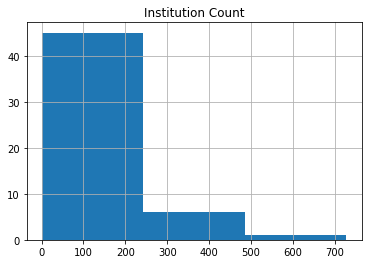

In [321]:
institutions_per_state.hist(bins=3)
# I'm going to make 3 bins for institutions per state.
# 0-225, 226-490, 491-730

In [316]:
institutions.columns

Index(['student orders', 'unitid', 'Percent admitted - total',
       'Admissions yield - total', 'Admissions yield - part time',
       'Tuition and fees, 2016-17', 'Total  enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Percent of full-time first-time undergraduates awarded any financial aid',
       'Percent of full-time first-time undergraduates awarded federal, state, local or institutional grant aid',
       'Average amount of federal, state, local or institutional grant aid awarded',
       'Percent of full-time first-time undergraduates awarded federal grant aid',
       'Percent of full-time first-time undergraduates awarded other student loans',
       'Average amount of other student loans awarded to full-time first-time undergraduates',
       'Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort',
       'Average amount of federal grant aid awarded to full-time first-time undergraduates',
       '

In [307]:
institutions.head()

,student orders,unitid,Percent admitted - total,Admissions yield - total,Admissions yield - part time,"Tuition and fees, 2016-17",Total enrollment,Full-time enrollment,Part-time enrollment,Percent of full-time first-time undergraduates awarded any financial aid,...,"sector_Private not-for-profit, 4-year or above","sector_Public, 2-year","sector_Public, 4-year or above","sector_Public, less-than 2-year",level_Four or more years,level_Less than 2 years (below associate),Level of institution,Sector of institution,institution name,FIPS state code
0,162,222178,58.000000,16.000000,1.000000,32070.0,5145.0,3846.0,1299.0,97.0,...,1,0,0,0,1,0,Four or more years,"Private not-for-profit, 4-year or above",Abilene Christian University,Texas
1,2,138558,70.000000,65.000000,12.000000,3453.0,3394.0,2470.0,924.0,88.0,...,0,0,1,0,1,0,Four or more years,"Public, 4-year or above",Abraham Baldwin Agricultural College,Georgia
2,1,172866,66.561832,30.652905,1.188073,17409.0,65.0,45.0,20.0,0.0,...,0,0,0,0,1,0,Four or more years,"Private for-profit, 4-year or above",Academy College,Minnesota
5,4,126182,99.000000,22.000000,1.000000,9153.0,3314.0,1864.0,1450.0,98.0,...,0,0,1,0,1,0,Four or more years,"Public, 4-year or above",Adams State University,Colorado
6,20,188429,73.000000,13.000000,0.000000,35740.0,7978.0,6329.0,1649.0,94.0,...,1,0,0,0,1,0,Four or more years,"Private not-for-profit, 4-year or above",Adelphi University,New York


In [311]:
grouped_on_state = institutions.groupby(['FIPS state code'])

In [312]:
grouped_on_state.head()

,student orders,unitid,Percent admitted - total,Admissions yield - total,Admissions yield - part time,"Tuition and fees, 2016-17",Total enrollment,Full-time enrollment,Part-time enrollment,Percent of full-time first-time undergraduates awarded any financial aid,...,"sector_Private not-for-profit, 4-year or above","sector_Public, 2-year","sector_Public, 4-year or above","sector_Public, less-than 2-year",level_Four or more years,level_Less than 2 years (below associate),Level of institution,Sector of institution,institution name,FIPS state code
0,162,222178,58.000000,16.000000,1.000000,32070.000000,5145.000000,3846.000000,1299.00000,97.000000,...,1,0,0,0,1,0,Four or more years,"Private not-for-profit, 4-year or above",Abilene Christian University,Texas
1,2,138558,70.000000,65.000000,12.000000,3453.000000,3394.000000,2470.000000,924.00000,88.000000,...,0,0,1,0,1,0,Four or more years,"Public, 4-year or above",Abraham Baldwin Agricultural College,Georgia
2,1,172866,66.561832,30.652905,1.188073,17409.000000,65.000000,45.000000,20.00000,0.000000,...,0,0,0,0,1,0,Four or more years,"Private for-profit, 4-year or above",Academy College,Minnesota
5,4,126182,99.000000,22.000000,1.000000,9153.000000,3314.000000,1864.000000,1450.00000,98.000000,...,0,0,1,0,1,0,Four or more years,"Public, 4-year or above",Adams State University,Colorado
6,20,188429,73.000000,13.000000,0.000000,35740.000000,7978.000000,6329.000000,1649.00000,94.000000,...,1,0,0,0,1,0,Four or more years,"Private not-for-profit, 4-year or above",Adelphi University,New York
7,1,188438,76.000000,55.333333,18.166667,4693.000000,3892.000000,2189.000000,1703.00000,75.000000,...,0,1,0,0,0,0,At least 2 but less than 4 years,"Public, 2-year",Adirondack Community College,New York
8,105,138716,66.561832,30.652905,1.188073,5490.000000,6615.000000,4093.000000,2522.00000,92.000000,...,0,0,1,0,1,0,Four or more years,"Public, 4-year or above",Albany State University,Georgia
9,1,138682,76.000000,55.333333,18.166667,2654.000000,3167.000000,1232.000000,1935.00000,95.000000,...,0,1,0,0,0,0,At least 2 but less than 4 years,"Public, 2-year",Albany Technical College,Georgia
10,1,128498,64.000000,19.000000,0.000000,30526.000000,1464.000000,1276.000000,188.00000,96.000000,...,1,0,0,0,1,0,Four or more years,"Private not-for-profit, 4-year or above",Albertus Magnus College,Connecticut
11,28,210571,50.000000,11.000000,0.000000,41544.000000,2036.000000,1993.000000,43.00000,100.000000,...,1,0,0,0,1,0,Four or more years,"Private not-for-profit, 4-year or above",Albright College,Pennsylvania


In [326]:
institutions = pd.merge(institutions,
                  institutions_per_state,
                  on='FIPS state code')

In [327]:
institutions.tail()

,student orders,unitid,Percent admitted - total,Admissions yield - total,Admissions yield - part time,"Tuition and fees, 2016-17",Total enrollment,Full-time enrollment,Part-time enrollment,Percent of full-time first-time undergraduates awarded any financial aid,...,"sector_Public, 2-year","sector_Public, 4-year or above","sector_Public, less-than 2-year",level_Four or more years,level_Less than 2 years (below associate),Level of institution,Sector of institution,institution name,FIPS state code,Institution Count
1096,14,240657,76.000000,55.333333,18.166667,3201.000000,1654.000000,953.000000,701.00000,93.000000,...,1,0,0,0,0,At least 2 but less than 4 years,"Public, 2-year",Northwest College,Wyoming,11
1097,1,240727,97.000000,41.000000,0.000000,5055.000000,12397.000000,9803.000000,2594.00000,95.000000,...,0,1,0,1,0,Four or more years,"Public, 4-year or above",University of Wyoming,Wyoming,11
1098,128,102553,83.000000,61.000000,17.000000,5784.000000,15733.000000,7162.000000,8571.00000,80.000000,...,0,1,0,1,0,Four or more years,"Public, 4-year or above",University of Alaska Anchorage,Alaska,10
1099,51,102614,77.000000,64.000000,13.000000,5976.000000,7664.000000,3501.000000,4163.00000,85.000000,...,0,1,0,1,0,Four or more years,"Public, 4-year or above",University of Alaska Fairbanks,Alaska,10
1100,1,103529,66.561832,30.652905,1.188073,19069.399743,10547.998759,7679.337469,2868.66129,87.345361,...,0,0,0,1,0,Four or more years,Administrative Unit,University of Alaska System of Higher Education,Alaska,10


In [328]:
bins = [0, 225, 490, 730]
institutions['Institution Count Group'] = pd.cut(institutions['Institution Count'], bins)

In [329]:
institutions.head()

,student orders,unitid,Percent admitted - total,Admissions yield - total,Admissions yield - part time,"Tuition and fees, 2016-17",Total enrollment,Full-time enrollment,Part-time enrollment,Percent of full-time first-time undergraduates awarded any financial aid,...,"sector_Public, 4-year or above","sector_Public, less-than 2-year",level_Four or more years,level_Less than 2 years (below associate),Level of institution,Sector of institution,institution name,FIPS state code,Institution Count,Institution Count Group
0,162,222178,58.000000,16.000000,1.000000,32070.0,5145.0,3846.0,1299.0,97.0,...,0,0,1,0,Four or more years,"Private not-for-profit, 4-year or above",Abilene Christian University,Texas,444,"(225, 490]"
1,135,222831,74.000000,49.000000,0.000000,7047.0,10417.0,6165.0,4252.0,94.0,...,1,0,1,0,Four or more years,"Public, 4-year or above",Angelo State University,Texas,444,"(225, 490]"
2,1,222983,52.000000,18.000000,0.000000,37315.0,1228.0,1218.0,10.0,100.0,...,0,0,1,0,Four or more years,"Private not-for-profit, 4-year or above",Austin College,Texas,444,"(225, 490]"
3,450,222992,76.000000,55.333333,18.166667,2550.0,40803.0,9130.0,31673.0,60.0,...,0,0,0,0,At least 2 but less than 4 years,"Public, 2-year",Austin Community College District,Texas,444,"(225, 490]"
4,1,444398,66.561832,30.652905,1.188073,6240.0,177.0,118.0,59.0,89.0,...,0,0,1,0,Four or more years,"Private not-for-profit, 4-year or above",Baptist University of the Americas,Texas,444,"(225, 490]"


In [330]:
institutions.groupby('Institution Count Group').mean()

,student orders,unitid,Percent admitted - total,Admissions yield - total,Admissions yield - part time,"Tuition and fees, 2016-17",Total enrollment,Full-time enrollment,Part-time enrollment,Percent of full-time first-time undergraduates awarded any financial aid,...,"sector_Private for-profit, 4-year or above","sector_Private for-profit, less-than 2-year","sector_Private not-for-profit, 2-year","sector_Private not-for-profit, 4-year or above","sector_Public, 2-year","sector_Public, 4-year or above","sector_Public, less-than 2-year",level_Four or more years,level_Less than 2 years (below associate),Institution Count
Institution Count Group,,,,,,,,,,,,,,,,,,,,,
"(0, 225]",72.319880,200203.853513,70.157594,37.038697,5.140380,14914.664704,9242.156010,6174.998506,3067.157504,86.233841,...,0.035874,0.0,0.004484,0.328849,0.221226,0.387145,0.0,0.766816,0.0,118.345291
"(225, 490]",67.721854,207465.778146,67.363723,33.921745,4.130192,18395.584414,10393.036412,6810.599379,3582.437033,86.108725,...,0.026490,0.0,0.013245,0.407285,0.152318,0.380795,0.0,0.824503,0.0,390.907285
"(490, 730]",60.523077,163984.415385,66.232590,42.595319,10.060986,9311.539159,13657.255090,7384.788487,6272.466603,72.614493,...,0.030769,0.0,0.000000,0.169231,0.461538,0.269231,0.0,0.484615,0.0,728.000000


In [331]:
institution_count_group_dummies = pd.get_dummies(institutions['Institution Count Group'], prefix='inst_group')
institution_count_group_dummies.drop(institution_count_group_dummies.columns[0], axis=1, inplace=True)
institutions = pd.concat([institutions, institution_count_group_dummies], axis=1)

In [342]:
institutions.isnull().sum()

student orders                                                                                             0
unitid                                                                                                     0
Percent admitted - total                                                                                   0
Admissions yield - total                                                                                   0
Admissions yield - part time                                                                               0
Tuition and fees, 2016-17                                                                                  0
Total  enrollment                                                                                          0
Full-time enrollment                                                                                       0
Part-time enrollment                                                                                       0
Percent of full-tim

In [389]:
# todo: add state population to institution and follow same process
# https://www.census.gov/data/tables/time-series/demo/popest/2010s-national-detail.html#par_textimage_1537638156

# I got the count of IPEDS institutions per state to try to get a better accuracy.

state_population = pd.read_csv('/Users/kaylibrownstein/Downloads/scprc-est2018-18+pop-res.csv')
state_population.head()


,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2018,POPEST18PLUS2018,PCNT_POPEST18PLUS
0,40,3,6,1,Alabama,4887871,3798031,77.7
1,40,4,9,2,Alaska,737438,553622,75.1
2,40,4,8,4,Arizona,7171646,5528989,77.1
3,40,3,7,5,Arkansas,3013825,2310645,76.7
4,40,4,9,6,California,39557045,30567090,77.3


In [390]:
state_population.rename(columns={'NAME': "FIPS state code"},inplace=True)
state_population.head()

,SUMLEV,REGION,DIVISION,STATE,FIPS state code,POPESTIMATE2018,POPEST18PLUS2018,PCNT_POPEST18PLUS
0,40,3,6,1,Alabama,4887871,3798031,77.7
1,40,4,9,2,Alaska,737438,553622,75.1
2,40,4,8,4,Arizona,7171646,5528989,77.1
3,40,3,7,5,Arkansas,3013825,2310645,76.7
4,40,4,9,6,California,39557045,30567090,77.3


In [391]:
state_pop_pared_down = state_population[['FIPS state code', 'POPEST18PLUS2018']]
state_pop_pared_down.head()

,FIPS state code,POPEST18PLUS2018
0,Alabama,3798031
1,Alaska,553622
2,Arizona,5528989
3,Arkansas,2310645
4,California,30567090


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c9b5668>]],
      dtype=object)

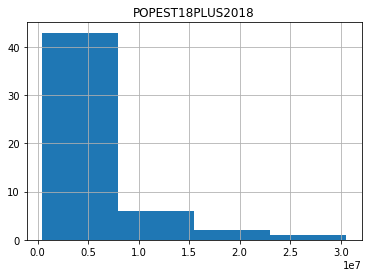

In [396]:
state_pop_pared_down.hist(bins=4)


In [397]:
institutions = pd.merge(institutions,
                  state_pop_pared_down,
                  on='FIPS state code')

In [399]:
institutions.tail()

,student orders,unitid,Percent admitted - total,Admissions yield - total,Admissions yield - part time,"Tuition and fees, 2016-17",Total enrollment,Full-time enrollment,Part-time enrollment,Percent of full-time first-time undergraduates awarded any financial aid,...,level_Less than 2 years (below associate),Level of institution,Sector of institution,institution name,FIPS state code,Institution Count,Institution Count Group,"inst_group_(225, 490]","inst_group_(490, 730]",POPEST18PLUS2018
1096,14,240657,76.000000,55.333333,18.166667,3201.000000,1654.000000,953.000000,701.00000,93.000000,...,0,At least 2 but less than 4 years,"Public, 2-year",Northwest College,Wyoming,11,"(0, 225]",0,0,442962
1097,1,240727,97.000000,41.000000,0.000000,5055.000000,12397.000000,9803.000000,2594.00000,95.000000,...,0,Four or more years,"Public, 4-year or above",University of Wyoming,Wyoming,11,"(0, 225]",0,0,442962
1098,128,102553,83.000000,61.000000,17.000000,5784.000000,15733.000000,7162.000000,8571.00000,80.000000,...,0,Four or more years,"Public, 4-year or above",University of Alaska Anchorage,Alaska,10,"(0, 225]",0,0,553622
1099,51,102614,77.000000,64.000000,13.000000,5976.000000,7664.000000,3501.000000,4163.00000,85.000000,...,0,Four or more years,"Public, 4-year or above",University of Alaska Fairbanks,Alaska,10,"(0, 225]",0,0,553622
1100,1,103529,66.561832,30.652905,1.188073,19069.399743,10547.998759,7679.337469,2868.66129,87.345361,...,0,Four or more years,Administrative Unit,University of Alaska System of Higher Education,Alaska,10,"(0, 225]",0,0,553622


In [400]:
bins = [0, 7500000, 15500000, 22500000, 31000000]
institutions['Population Count Group'] = pd.cut(institutions['POPEST18PLUS2018'], bins)

In [403]:
institutions.head()

,student orders,unitid,Percent admitted - total,Admissions yield - total,Admissions yield - part time,"Tuition and fees, 2016-17",Total enrollment,Full-time enrollment,Part-time enrollment,Percent of full-time first-time undergraduates awarded any financial aid,...,Level of institution,Sector of institution,institution name,FIPS state code,Institution Count,Institution Count Group,"inst_group_(225, 490]","inst_group_(490, 730]",POPEST18PLUS2018,Population Count Group
0,162,222178,58.000000,16.000000,1.000000,32070.0,5145.0,3846.0,1299.0,97.0,...,Four or more years,"Private not-for-profit, 4-year or above",Abilene Christian University,Texas,444,"(225, 490]",1,0,21303746,"(15500000, 22500000]"
1,135,222831,74.000000,49.000000,0.000000,7047.0,10417.0,6165.0,4252.0,94.0,...,Four or more years,"Public, 4-year or above",Angelo State University,Texas,444,"(225, 490]",1,0,21303746,"(15500000, 22500000]"
2,1,222983,52.000000,18.000000,0.000000,37315.0,1228.0,1218.0,10.0,100.0,...,Four or more years,"Private not-for-profit, 4-year or above",Austin College,Texas,444,"(225, 490]",1,0,21303746,"(15500000, 22500000]"
3,450,222992,76.000000,55.333333,18.166667,2550.0,40803.0,9130.0,31673.0,60.0,...,At least 2 but less than 4 years,"Public, 2-year",Austin Community College District,Texas,444,"(225, 490]",1,0,21303746,"(15500000, 22500000]"
4,1,444398,66.561832,30.652905,1.188073,6240.0,177.0,118.0,59.0,89.0,...,Four or more years,"Private not-for-profit, 4-year or above",Baptist University of the Americas,Texas,444,"(225, 490]",1,0,21303746,"(15500000, 22500000]"


In [404]:
pop_count_group_dummies = pd.get_dummies(institutions['Population Count Group'], prefix='pop_group')
pop_count_group_dummies.drop(pop_count_group_dummies.columns[0], axis=1, inplace=True)
institutions = pd.concat([institutions, pop_count_group_dummies], axis=1)

In [407]:
institutions.tail()

,student orders,unitid,Percent admitted - total,Admissions yield - total,Admissions yield - part time,"Tuition and fees, 2016-17",Total enrollment,Full-time enrollment,Part-time enrollment,Percent of full-time first-time undergraduates awarded any financial aid,...,FIPS state code,Institution Count,Institution Count Group,"inst_group_(225, 490]","inst_group_(490, 730]",POPEST18PLUS2018,Population Count Group,"pop_group_(7500000, 15500000]","pop_group_(15500000, 22500000]","pop_group_(22500000, 31000000]"
1096,14,240657,76.000000,55.333333,18.166667,3201.000000,1654.000000,953.000000,701.00000,93.000000,...,Wyoming,11,"(0, 225]",0,0,442962,"(0, 7500000]",0,0,0
1097,1,240727,97.000000,41.000000,0.000000,5055.000000,12397.000000,9803.000000,2594.00000,95.000000,...,Wyoming,11,"(0, 225]",0,0,442962,"(0, 7500000]",0,0,0
1098,128,102553,83.000000,61.000000,17.000000,5784.000000,15733.000000,7162.000000,8571.00000,80.000000,...,Alaska,10,"(0, 225]",0,0,553622,"(0, 7500000]",0,0,0
1099,51,102614,77.000000,64.000000,13.000000,5976.000000,7664.000000,3501.000000,4163.00000,85.000000,...,Alaska,10,"(0, 225]",0,0,553622,"(0, 7500000]",0,0,0
1100,1,103529,66.561832,30.652905,1.188073,19069.399743,10547.998759,7679.337469,2868.66129,87.345361,...,Alaska,10,"(0, 225]",0,0,553622,"(0, 7500000]",0,0,0


In [437]:
from sklearn.ensemble import RandomForestRegressor

# max_features=5 is best and n_estimators=150 is sufficiently large.
rfreg = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True, random_state=1)

feature_cols + [
                'inst_group_(225, 490]',
                'inst_group_(490, 730]',
                'pop_group_(7500000, 15500000]',
                'pop_group_(15500000, 22500000]',
                'pop_group_(22500000, 31000000]'
            ]
            
X = institutions[feature_cols]

rfreg.fit(X, y)

pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance')

,feature,importance
6,"sector_Private for-profit, less-than 2-year",0.000000
11,"sector_Public, less-than 2-year",0.000000
13,level_Less than 2 years (below associate),0.000000
15,level_Less than 2 years (below associate),0.000000
4,"sector_Private for-profit, 2-year",0.000175
7,"sector_Private not-for-profit, 2-year",0.000284
14,level_Four or more years,0.002119
9,"sector_Public, 2-year",0.002596
12,level_Four or more years,0.002791
5,"sector_Private for-profit, 4-year or above",0.002913


In [413]:
# Compute the out-of-bag R-squared score.
print((rfreg.oob_score_))

# Find the average RMSE.
scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

-0.06035431217106502


157.14717732719652

In [414]:
X_important =  SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_test)

In [415]:
rfreg = RandomForestRegressor(n_estimators=110, random_state=1)

scores = cross_val_score(rfreg, X_important, y_test, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))


132.54667935080445

In [419]:
df2 = institutions.columns.get_values()

In [420]:
df2.tolist()

['student orders',
 'unitid',
 'Percent admitted - total',
 'Admissions yield - total',
 'Admissions yield - part time',
 'Tuition and fees, 2016-17',
 'Total  enrollment',
 'Full-time enrollment',
 'Part-time enrollment',
 'Percent of full-time first-time undergraduates awarded any financial aid',
 'Percent of full-time first-time undergraduates awarded federal, state, local or institutional grant aid',
 'Average amount of federal, state, local or institutional grant aid awarded',
 'Percent of full-time first-time undergraduates awarded federal grant aid',
 'Percent of full-time first-time undergraduates awarded other student loans',
 'Average amount of other student loans awarded to full-time first-time undergraduates',
 'Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort',
 'Average amount of federal grant aid awarded to full-time first-time undergraduates',
 'Graduation rate, total cohort',
 '12-month unduplicated headcount, underg

In [665]:
all_ipeds_institutions = pd.read_csv('/Users/kaylibrownstein/Desktop/general-assembly/sort2.csv', header=None)

In [666]:
all_ipeds_institutions.columns = all_ipeds_institutions.iloc[6962]
all_ipeds_institutions.drop([6962], inplace=True)

In [667]:
all_ipeds_institutions.head()

all_ipeds_institutions['unitid'] = pd.to_numeric(all_ipeds_institutions['unitid'])


In [668]:
all_ipeds_institutions.shape

(6962, 32)

In [669]:
ipeds_institutions_w_student_orders = pd.read_csv('/Users/kaylibrownstein/Desktop/general-assembly/sort1.csv', header=0)


In [670]:
ipeds_institutions_w_student_orders.head()

,name,COUNT(*),unitid
0,University of Alabama at Birmingham,179,100663
1,University of Alabama in Huntsville,192,100706
2,The University of Alabama,10,100751
3,Auburn University,784,100858
4,Faulkner University,59,101189


In [671]:
ipeds_institutions_w_student_orders.rename(columns={'name': 'institution name', 'COUNT(*)': 'student orders'}, inplace=True)


In [672]:
ipeds_institutions_w_student_orders.head()

,institution name,student orders,unitid
0,University of Alabama at Birmingham,179,100663
1,University of Alabama in Huntsville,192,100706
2,The University of Alabama,10,100751
3,Auburn University,784,100858
4,Faulkner University,59,101189


In [673]:
ipeds_institutions_w_student_orders_wo_name = ipeds_institutions_w_student_orders.drop(columns=['institution name'])

In [674]:
ipeds_institutions_w_student_orders_wo_name.head()

ipeds_institutions_w_student_orders_wo_name.dtypes

student orders    int64
unitid            int64
dtype: object

In [677]:
ipeds_institutions_predictions = pd.merge(ipeds_institutions_w_student_orders_wo_name, all_ipeds_institutions, on='unitid', how='outer')


In [678]:
ipeds_institutions_predictions.shape

(6983, 33)

In [680]:
ipeds_institutions_predictions.tail()

,student orders,unitid,institution name,year,HD2017.FIPS state code,DRVADM2017.Percent admitted - total,DRVADM2017.Admissions yield - total,DRVADM2017.Admissions yield - women,DRVADM2017.Admissions yield - part time,"DRVIC2017.Tuition and fees, 2016-17",...,"SFA1617.Average net price-students awarded grant or scholarship aid, 2016-17","SFA1617.Average net price-students awarded grant or scholarship aid, 2016-17",SFA1617.Number of students in full-year cohort,SFA1617.Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort,SFA1617.Number of full-time first-time undergraduates awarded any financial aid,SFA1617.Percent of full-time first-time undergraduates awarded any financial aid,"SFA1617.Average amount of federal, state, local or institutional grant aid awarded",SFA1617.Average amount of federal grant aid awarded to full-time first-time undergraduates,"DRVGR2017.Graduation rate, total cohort","DRVEF122017.12-month unduplicated headcount, undergraduate: 2016-17"
6978,NaN,491251,The Culinary School of Fort Worth,2017,Texas,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6979,NaN,491288,University of Wisconsin-Milwaukee Flex,2017,Wisconsin,0,NaN,NaN,NaN,9000,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,627
6980,NaN,491297,University of Wisconsin-Parkside Flex,2017,Wisconsin,100,0,0,0,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,10
6981,NaN,491303,University of Wisconsin Colleges Flex,2017,Wisconsin,80,100,100,100,9000,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,362
6982,NaN,491394,Edge Tech Academy,2017,Texas,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [687]:
ipeds_institutions_predictions['student orders'] = ipeds_institutions_predictions['student orders'].fillna(0)


In [689]:
ipeds_institutions_predictions.head()

,student orders,unitid,institution name,year,HD2017.FIPS state code,DRVADM2017.Percent admitted - total,DRVADM2017.Admissions yield - total,DRVADM2017.Admissions yield - women,DRVADM2017.Admissions yield - part time,"DRVIC2017.Tuition and fees, 2016-17",...,"SFA1617.Average net price-students awarded grant or scholarship aid, 2016-17","SFA1617.Average net price-students awarded grant or scholarship aid, 2016-17",SFA1617.Number of students in full-year cohort,SFA1617.Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort,SFA1617.Number of full-time first-time undergraduates awarded any financial aid,SFA1617.Percent of full-time first-time undergraduates awarded any financial aid,"SFA1617.Average amount of federal, state, local or institutional grant aid awarded",SFA1617.Average amount of federal grant aid awarded to full-time first-time undergraduates,"DRVGR2017.Graduation rate, total cohort","DRVEF122017.12-month unduplicated headcount, undergraduate: 2016-17"
0,179.0,100663,University of Alabama at Birmingham,2017,Alabama,92,33,32,1,8040,...,17016,NaN,NaN,1948,1837,94,9254,5112,53,13308
1,192.0,100706,University of Alabama in Huntsville,2017,Alabama,81,37,32,0,9842,...,14766,NaN,NaN,1203,1107,92,9587,4635,49,7519
2,10.0,100751,The University of Alabama,2017,Alabama,53,36,34,0,10470,...,19993,NaN,NaN,7512,6069,81,16494,4842,68,35625
3,784.0,100858,Auburn University,2017,Alabama,84,32,30,0,10696,...,22613,NaN,NaN,4487,3429,76,9030,4773,77,23846
4,59.0,101189,Faulkner University,2017,Alabama,51,28,24,2,20130,...,NaN,19337,NaN,307,305,99,12340,5050,28,3143
